<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - Climate 101 Workshop

## Interactive Data Activity

This notebook is an interactive activity to demonstrate the capabilities of using **Python** to work with climate data! We will be using packages such as **xarray** to open and manipulate climate data into a meaningful graph. 

In [15]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

## Challenge 1 - Select Your Data

The data we are using is described as a "Monthly aggregation of downscaled daily meteorological data of Monthly Precipitation Amount from College of Global Change and Earth System Science, Beijing Normal University". In short, the data is monthly summary of lots of meteorological data, such as precipitation, air temperature, and more. The data also includes a climate model of what is likely to come for these variables. 

Below, you will assign three variables to choose which data you want to work with in this notebook. 

`model = ` can be set to any number between 0 and 19. You can see the list of models you are choosing from in the cell two below this one. The models are listed after `model_name = ` All of the models are different models for how the climate will change going into the future. There are 20 options for models, and to pick one you can assign `model = ` to any number between 0 and 19, where 0 is the first option in the list, and 19 is the last. 

`var = ` is the variable in the dataset you want to be analyzed. You can see the variables in the cell two below this one. The variables are listed after `var_long_name = `. The variables are as described by the variable name, so `air_temperature` is the aggregate air temperature for each month, for example. There are 9 options for variables, and to pick one you can assign `var = ` to any number between 0 and 8, where 0 is the first option in the list, and 8 is the last. 

Lastly, `scenario = ` can be chosen to pick which climate scenario you want to pull your data from. `0` is the historical data and doesn't include any modeling. `1` is the `rcp45` scenario, which is described as an intermediate climate scenario. `2` is the `rcp85` scenario, which is a worst case climate scenario. 

In [16]:
# Model options between 0-19
model = 2
# Options 0-8 will work for var. Var maps to the variable name below
var = 4
# Options range from 0-2
scenario = 1

In [17]:
dir_path = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/'

# These are the variable options for the met data
variable_name = ('tasmax',
                 'tasmin',
                 'rhsmax',
                 'rhsmin',
                 'pr',
                 'rsds',
                 'uas',
                 'vas',
                 'huss')

# These are var options in long form
var_long_name = ('air_temperature',
                 'air_temperature',
                 'relative_humidity',
                 'relative_humidity',
                 'precipitation',
                 'surface_downwelling_shortwave_flux_in_air',
                 'eastward_wind',
                 'northward_wind',
                 'specific_humidity')

# Models to chose from
model_name = ('bcc-csm1-1',
              'bcc-csm1-1-m',
              'BNU-ESM',
              'CanESM2',
              'CCSM4',
              'CNRM-CM5',
              'CSIRO-Mk3-6-0',
              'GFDL-ESM2G',
              'GFDL-ESM2M',
              'HadGEM2-CC365',
              'HadGEM2-ES365',
              'inmcm4',
              'IPSL-CM5A-MR',
              'IPSL-CM5A-LR',
              'IPSL-CM5B-LR',
              'MIROC5',
              'MIROC-ESM',
              'MIROC-ESM-CHEM',
              'MRI-CGCM3',
              'NorESM1-M')

# Scenarios
scenario_type = ('historical', 'rcp45', 'rcp85')

# Year start and ends (historical vs projected)
year_start = ('1950', '2006', '2006')
year_end = ('2005', '2099', '2099')
run_num = [1] * 20
run_num[4] = 6  # setting CCSM4 with run 6
domain = 'CONUS'

In [18]:
time = year_start[scenario]+'_' + year_end[scenario]
print("Your selected time period is:", time)

Your selected time period is: 2006_2099


In [19]:
# This is only going to provide monthly data
file_name = ('agg_macav2metdata_' +
             str(variable_name[var]) +
             '_' +
             str(model_name[model]) +
             '_r' +
             str(run_num[model])+'i1p1_' +
             str(scenario_type[scenario]) +
             '_' +
             time + '_' +
             domain + '_monthly.nc')

print("You are accessing:\n", file_name, "\n data in netcdf format")

You are accessing:
 agg_macav2metdata_pr_BNU-ESM_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc 
 data in netcdf format


In [20]:
full_file_path = dir_path + file_name
full_file_path

'http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_pr_BNU-ESM_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc'

## Challenge 2 - Run the Cell Below to Open Your Data

Run the cell below to open your dataset.


In [21]:
# Open the data
with xr.open_dataset(full_file_path) as file_nc:
    max_var_xr = file_nc

# View xarray object
max_var_xr

<xarray.Dataset>
Dimensions:        (crs: 1, lat: 585, lon: 1386, time: 1128)
Coordinates:
  * lat            (lat) float64 25.06 25.1 25.15 25.19 ... 49.31 49.35 49.4
  * crs            (crs) int32 1
  * lon            (lon) float64 235.2 235.3 235.3 235.4 ... 292.9 292.9 292.9
  * time           (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes:
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    title:                           Monthly aggregation of downscaled daily ...
    summary:                         This archive contains monthly downscaled...
    keywords:                        monthly, precipitation, maximum temperat...
    keywords_vocabulary:             
    standard_name_vocabulary:        CF-1.0
    history:                         No revisions.
    comment:                         Total daily precipitation at surface; in...
    geospatial_bounds:               POLYGON((-124.7722 25.0631,-124.7722 49....
    geospatial_lat_min:              25.0631
    geospatial_lat_max:              49.3960
    geospatial_lon_min:              -124.7722
    geospatial_lon_max:              -67.0648
    geospatial_lat_units:            decimal degrees north
    geospatial_lon_units:            decimal degrees east
    geospatial_lat_resolution:       0.0417
    geospatial_lon_resolution:       0.0417
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         0.0
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    up
    time_coverage_start:             2091-01-01T00:0
    time_coverage_end:               2095-12-31T00:00
    time_coverage_duration:          P5Y
    time_coverage_resolution:        P1M
    date_created:                    2014-05-15
    date_modified:                   2014-05-15
    date_issued:                     2014-05-15
    creator_name:                    John Abatzoglou
    creator_url:                     http://maca.northwestknowledge.net
    creator_email:                   jabatzoglou@uidaho.edu
    institution:                     University of Idaho
    processing_level:                GRID
    project:                         
    contributor_name:                Katherine C. Hegewisch
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326

## Challenge 3 - Subset Your Data

Currently, the dataset you have is too big to work with. You can fix this by subsetting the data! There are two ways you can subset the data: spatially, and temporally. 

To spatially subset the data, you will only look at data from one point in the xarray Dataset. Below, assign a new number for `latitude` and `longitude` to pick a new point. The data's latitude values range from about 25 to 50, and the data's longitude values range from 235 to 292. So try and pick new values within those ranges.

To temporally subset the data, you can pick a start date and end date to trim the data to. Below, assign new values for the data to start and end at. Make sure the values you assign stay in the quotes provided. The format should be `'yyyy-mm'`. Keep in mind that depending on which scenario you chose above, the years of your data will be different. So pick dates that are within the scenario you chose!

|Scenario Number|Date Range|
|-------|-----------|
|0|1950-2005|
|1|2006-2099|
|2|2006-2099|

In [22]:
# Select the latitude, longitude, and timeframe to subset the data to

# Ensure your latitude value is between 25 and 50, and your logitude value is between 235 and 292
latitude = 35
longitude = 270
time_start = '2008-01'
time_end = '2012-09'

In [23]:
# Selecting the nearest point to the latitude and longitude that was input
max_var_point = max_var_xr[var_long_name[var]].sel(
    lat=latitude, lon=longitude, method='pad')

# Slicing the data to the timeframe requested
max_var_point = max_var_point.sel(time=slice(time_start, time_end))

Below is a plot that shows where the latitude and longitude you selected are, and where the data in the rest notebook will be pulled from!

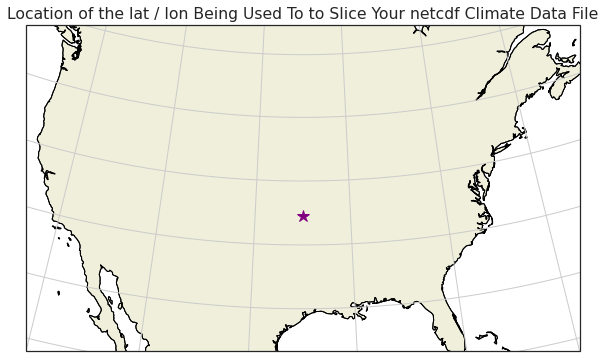

In [71]:
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

f, ax = plt.subplots(figsize=(12, 6),
                     subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
ax.coastlines()
ax.set_extent(extent)
ax.plot(longitude, latitude,
        markersize=12,
        marker='*',
        color='purple')
ax.set(title="Location of the lat / lon Being Used To to Slice Your netcdf Climate Data File")

# Adds a bunch of elements to the map
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.gridlines()
plt.show()

## Challenge 4 - Modify your plot

With the newly subset data being more reasonable in size, you can now plot the data! Below is the code you use to plot a line showing the change in the variable you selected at the top over time. 

There are a few aspects of the plot that you can modify to make the plot even better. First, you can change the title, xlabel, and ylabel by modifying the code seen here: 

```
ax.set(title="Modify this text to change the title!", 

       xlabel="Modify this text to change the x axis label!",
       
       ylabel="Modify this text to change the y axis label!")
```

Make sure when you change the names of those variables, that you keep the new title or axis label within the quotes already there.

You can also change the color of the plot by changing these variables colors listed after `color=`, `markerfacecolor=`, and `markeredgecolor=`. Change those to colors you think fit the plot better and see what changes! When you change them to a new color, make sure the new color is still within the quotes provided. 

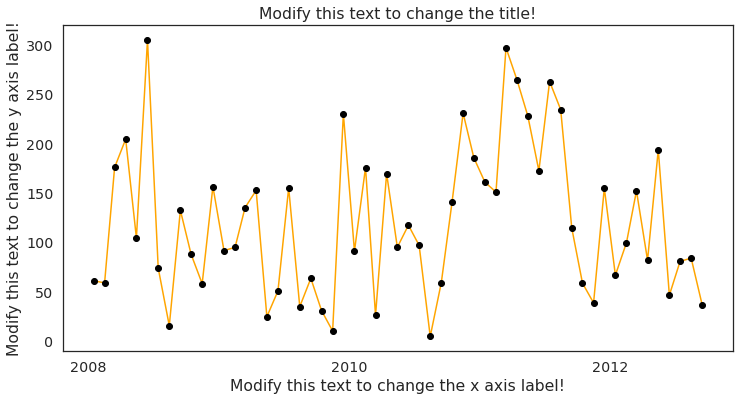

In [25]:
# Plotting the subset data
fig, ax = plt.subplots(figsize=(12, 6))
max_var_point.plot.line(ax=ax,
                        marker="o",
                        # Change the line color
                        color="orange",
                        # Change both variables below to change the color of the markers
                        markerfacecolor="black",
                        markeredgecolor="black")

# Change the values below to match the data you selected
ax.set(title="Modify this text to change the title!",
       xlabel="Modify this text to change the x axis label!",
       ylabel="Modify this text to change the y axis label!")

plt.show()

## Challenge 5  - Export your data to a csv file

This subset data is worth sharing! Below you will export the data to a `.csv` file. 

In [26]:
# Changing your data to a numpy dataframe to make it exportable
max_var_point_df = max_var_point.to_dataframe()
max_var_point_df.head()

,lat,lon,precipitation
time,,,
2008-01-15 00:00:00,34.979588,269.977295,61.559265
2008-02-15 00:00:00,34.979588,269.977295,59.364491
2008-03-15 00:00:00,34.979588,269.977295,176.311966
2008-04-15 00:00:00,34.979588,269.977295,204.975952
2008-05-15 00:00:00,34.979588,269.977295,104.840355


In [27]:
# Creating a file name based on the variables you chose earlier!
# The name should be the variable you chose, and then the start and end date of the subset
file_name = var_long_name[var] + "-" + time_start + "-" + time_end + ".csv"
file_name

'precipitation-2008-01-2012-09.csv'

In [28]:
# Export to a csv file to share with your friends!
max_var_point_df.to_csv(file_name)